In [54]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [55]:
mov = pd.read_csv("mov.csv")
teams = mov["Visitor/Neutral"].unique()

def get_mov(row):
    return row["PTS1"] - row["PTS2"]
    # Returns Visiting - Home

mov["MOV"] = mov.apply(lambda x: get_mov(x), axis=1)
mov = mov[["Date", "Visitor/Neutral", "PTS1", "Home/Neutral", "PTS2", "MOV"]]
mov.columns = ["Date", "Team1", "PTS1", "Team2", "PTS2", "MOV"]

# We need to switch Team1 and Team2, to make it easier to filter later on
# Create a new DataFrame, and then concat the two
mov2 = []
for i, row in mov.iterrows():
    mov2.append([row.Date, row.Team2, row.PTS2, row.Team1, row.PTS1, -row.MOV])
    
mov2 = pd.DataFrame(mov2)
mov2.columns = mov.columns

mov = pd.concat([mov, mov2])
mov = mov.reset_index()

mov.sort_values("index").to_csv("all_mov.csv")

New York Knicks


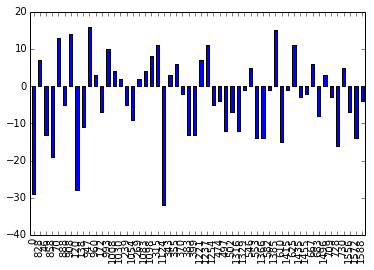

San Antonio Spurs


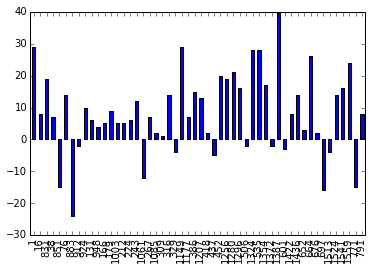

Utah Jazz


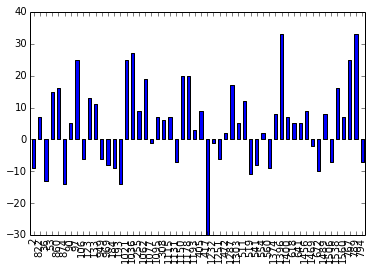

Brooklyn Nets


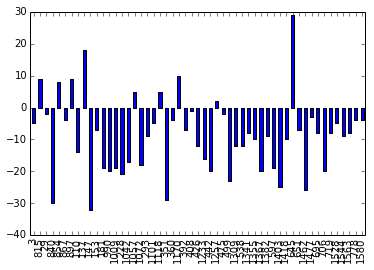

Dallas Mavericks


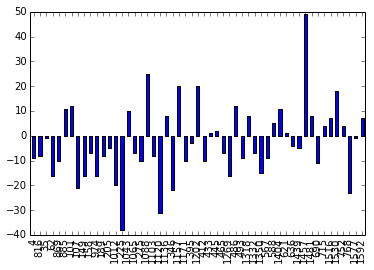

Houston Rockets


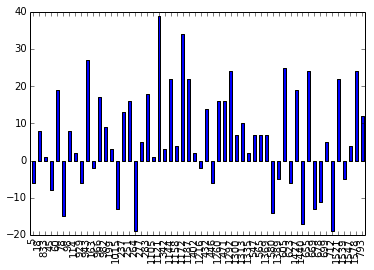

Minnesota Timberwolves


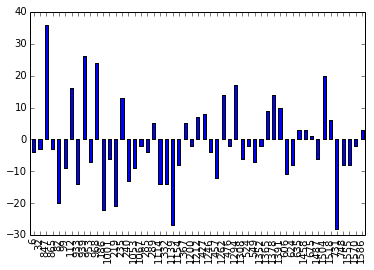

Charlotte Hornets


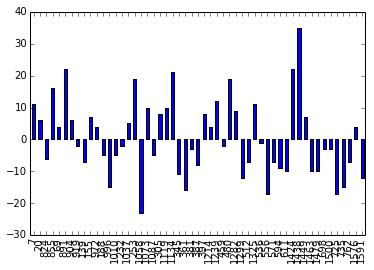

Denver Nuggets


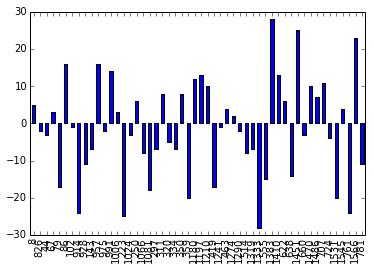

Miami Heat


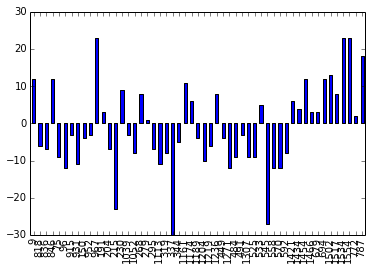

Oklahoma City Thunder


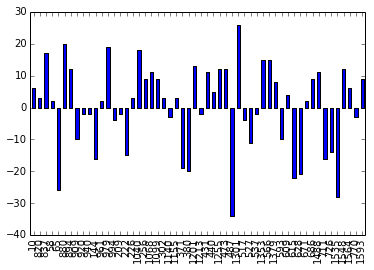

Sacramento Kings


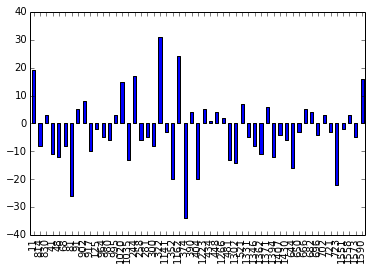

Detroit Pistons


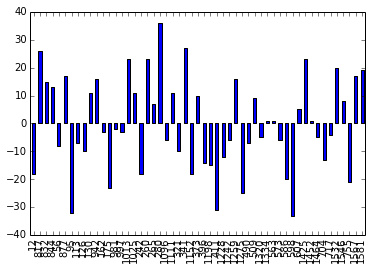

Washington Wizards


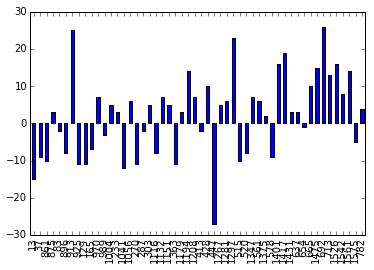

Boston Celtics


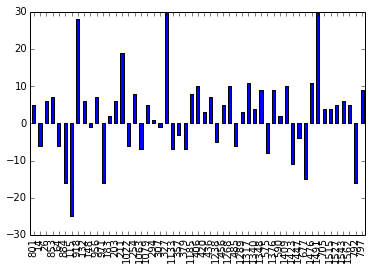

Los Angeles Clippers


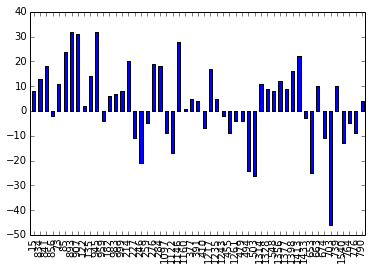

Indiana Pacers


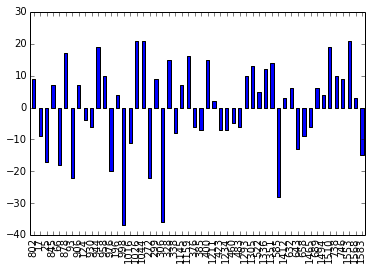

Orlando Magic


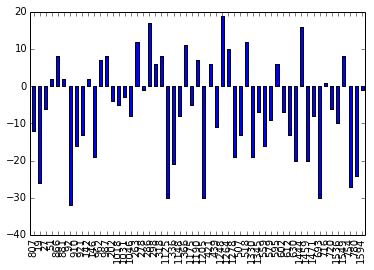

Golden State Warriors


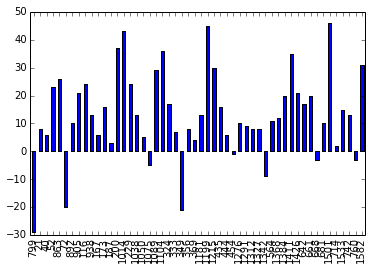

Phoenix Suns


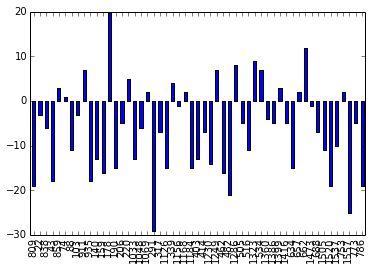

Cleveland Cavaliers


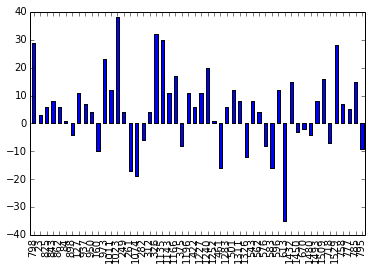

Los Angeles Lakers


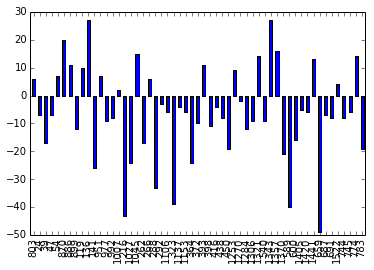

Portland Trail Blazers


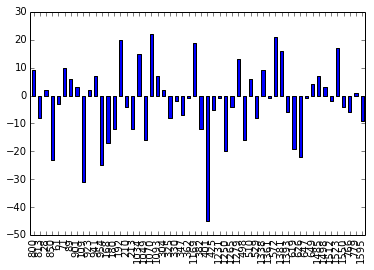

Memphis Grizzlies


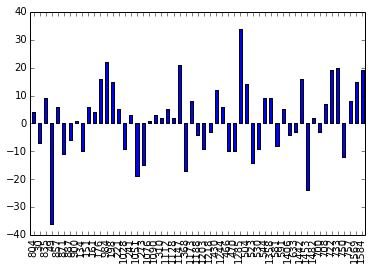

Atlanta Hawks


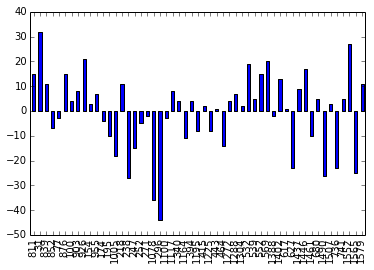

New Orleans Pelicans


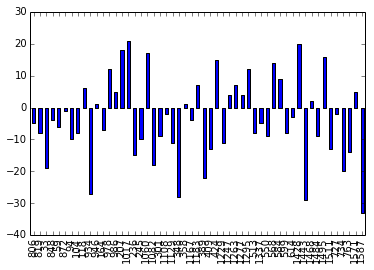

Milwaukee Bucks


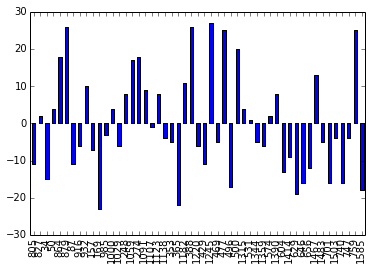

Chicago Bulls


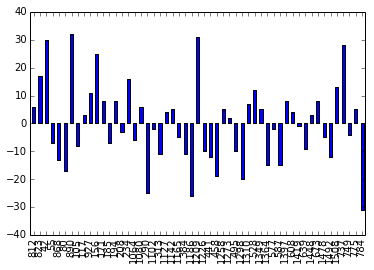

Philadelphia 76ers


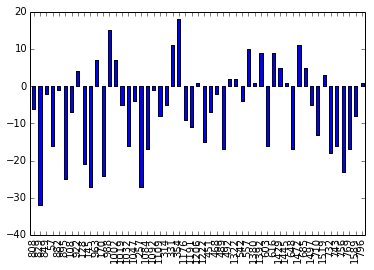

Toronto Raptors


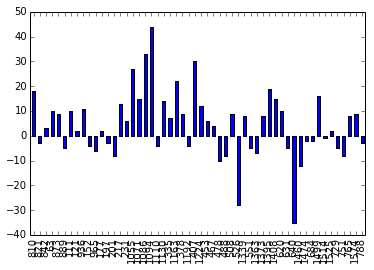

In [57]:
# Create our data visualization in matplotlib

for team in teams:
    teamframe = mov[mov["Team1"] == team]
    teamframe = teamframe.sort_values("index")
    print team
    teamframe["MOV"].plot(kind='bar')
    plt.show()